In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
train_df=pd.read_csv('loan-train.csv')
test_df=pd.read_csv('loan-test.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode(), inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode(), inplace=True) 

In [20]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True) 
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True) 

In [21]:
train_df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [45]:
train_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
train_df['Married'].replace({'Yes':1,'No':0},inplace=True)
train_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

test_df['Gender'].replace({'Male':1,'Female':0},inplace=True)
test_df['Married'].replace({'Yes':1,'No':0},inplace=True)
test_df['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)


In [46]:
train_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
test_df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)

In [47]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True) 

train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True) 

train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True) 

train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True) 

train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True) 


In [48]:
from sklearn.preprocessing import LabelEncoder
col = ['Property_Area', 'Dependents']
le = LabelEncoder()
for x in col:
    train_df[x] = le.fit_transform(train_df[x])
    test_df[x] = le.fit_transform(test_df[x])


In [49]:
train_df['Dependents'] = le.fit_transform(train_df['Dependents'].astype(str))
test_df['Dependents'] = le.fit_transform(test_df['Dependents'].astype(str))

In [50]:
train_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1.0,1.0,0,0,0.0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1.0,1.0,3,1,0.0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1.0,1.0,2,1,0.0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1.0,1.0,1,1,0.0,12841,10968.0,349.000000,360.0,1.0,1,0


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

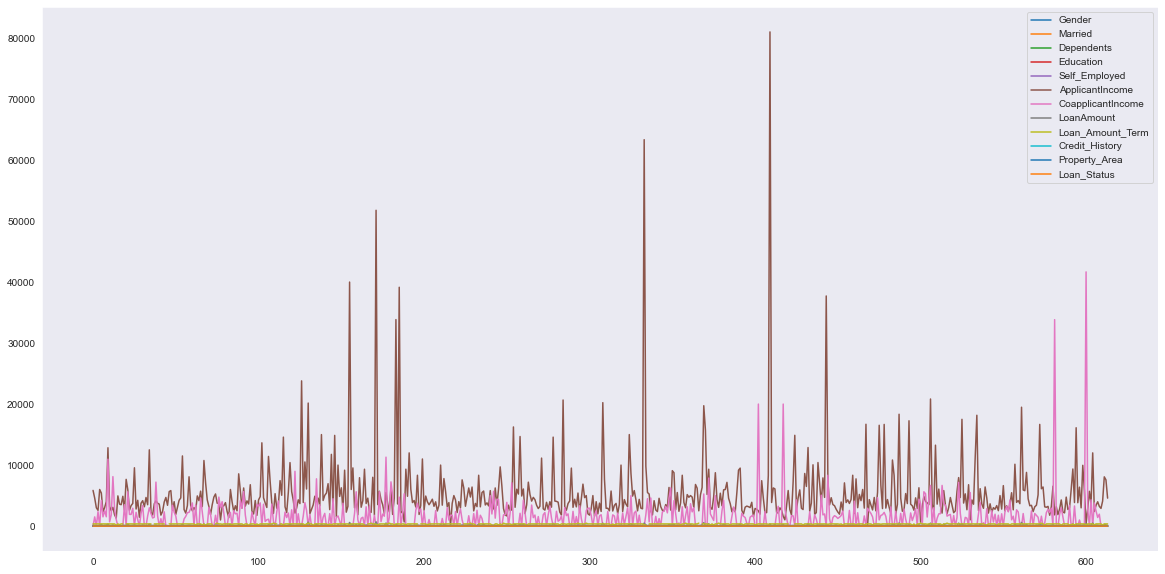

In [52]:
train_df.plot(figsize=(20,10))
plt.show()


In [53]:
train_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074539,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.102049,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.102028,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.078784,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.034361,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045306,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059878,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038926,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.074539,-0.102049,-0.102028,0.078784,-0.034361,-0.045306,-0.059878,0.038926,1.000000,0.000445,-0.078748,-0.021268
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000445,1.000000,0.001963,0.540556


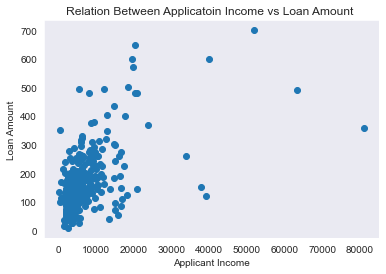

In [54]:
#y depended
plt.scatter(train_df['ApplicantIncome'],train_df['LoanAmount'] )
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.show()

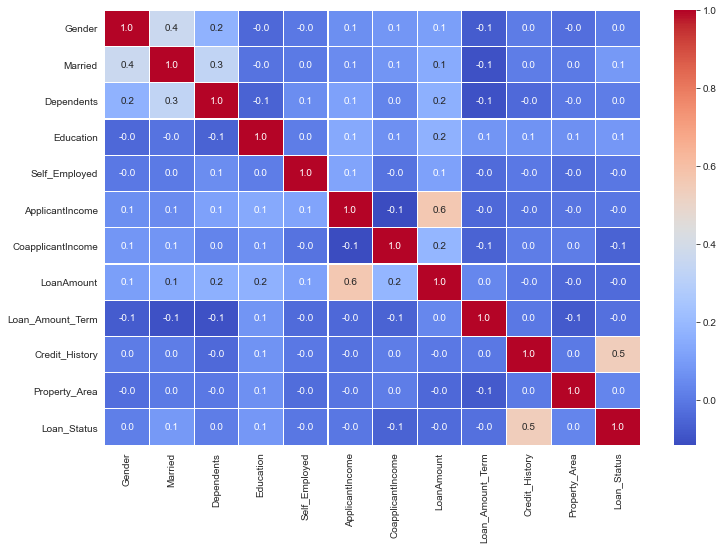

In [55]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()


In [56]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [57]:
pred_model = LogisticRegression()

In [58]:
features = ['Credit_History', 'Education', 'Gender']

x_train = train_df[features].values
y_train = train_df['Loan_Status'].values

x_test = test_df[features].values

In [59]:
pred_model.fit(x_train, y_train)

LogisticRegression()

In [61]:
predicted = pred_model.predict(x_test)
print('Coefficient :', pred_model.coef_)
print('Intercept of model',pred_model.intercept_)


Coefficient : [[3.30731267 0.32017165 0.10627116]]
Intercept of model [-2.35337046]


In [65]:
score = pred_model.score(x_train, y_train)
print('score (%) :', round(score*100,2))

score (%) : 80.94


In [66]:
print(predicted)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
